In [ ]:
# Untuk Mengetahui Spesifikasi GPU yang digunakan
# Pada Google Colab free menggunakan GPU NVIDIA Tesla T4
!nvidia-smi

Wed Dec 28 04:55:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/skripsi/

/content/gdrive/MyDrive/skripsi


In [ ]:
# !git clone 'https://github.com/roboflow-ai/darknet.git' '/content/gdrive/My Drive/yolov3'
# !git clone 'https://github.com/AlexeyAB/darknet' '/content/gdrive/My Drive/skripsi'

Cloning into '/content/gdrive/My Drive/skripsi'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 1 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.09 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (10411/10411), done.
Checking out files: 100% (2057/2057), done.


In [ ]:
# !git clone 'https://github.com/soumik12345/MIRNet' '/content/gdrive/My Drive/skripsi/MIRNet'

Cloning into '/content/gdrive/My Drive/skripsi/MIRNet'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 251 (delta 10), reused 8 (delta 8), pack-reused 237
Receiving objects: 100% (251/251), 28.13 MiB | 18.68 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [ ]:
%cd /content/gdrive/MyDrive/skripsi/MIRNet

/content/gdrive/MyDrive/skripsi/MIRNet


In [ ]:
!pip install -q wandb

     |████████████████████████████████| 1.9 MB 15.4 MB/s 
     |████████████████████████████████| 182 kB 69.0 MB/s 
     |████████████████████████████████| 174 kB 70.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 173 kB 67.0 MB/s 
     |████████████████████████████████| 168 kB 71.9 MB/s 
     |████████████████████████████████| 168 kB 80.5 MB/s 
     |████████████████████████████████| 166 kB 79.2 MB/s 
     |████████████████████████████████| 166 kB 78.0 MB/s 
     |████████████████████████████████| 162 kB 75.7 MB/s 
     |████████████████████████████████| 162 kB 80.7 MB/s 
     |████████████████████████████████| 158 kB 73.5 MB/s 
     |████████████████████████████████| 157 kB 82.7 MB/s 
     |████████████████████████████████| 157 kB 83.1 MB/s 
     |████████████████████████████████| 157 kB 81.0 MB/s 
     |████████████████████████████████| 157 kB 83.8 MB/s 
     |████████████████████████████████| 157 kB 84.1 MB/s 
     |██████████

In [ ]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer #  modul ini ada di dalam wandb
# from mirnet.utils import download_dataset, plot_result
# from tensorflow.python.compiler.tensorrt import trt_convert as trt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import time
import os
import cv2

print(tf.__version__)

2.9.2


In [ ]:
#define utility function
def imShow(path):
  # import cv2
  # import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
## Load Model MIRNet

%cd /content/gdrive/MyDrive/skripsi/MIRNet
inferer = Inferer()
# inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)

/content/gdrive/MyDrive/skripsi/MIRNet


In [ ]:
input_path = '/content/gdrive/MyDrive/skripsi/test/'
output_path = '/content/gdrive/MyDrive/skripsi/enhanced/'

In [ ]:
## Enhance Low Light Image

%cd /content/gdrive/MyDrive/skripsi/MIRNet
for img_path in glob(input_path+'/*.jpg')[:1]:
# for image_path in os.listdir(input_path)[:5]:
  # print(image_path)
  print(output_path+img_path.split('/')[-1])
  print(img_path)
  original_image, output_image = inferer.infer(img_path)
  ouput_image = output_image.save(output_path+img_path.split('/')[-1])

/content/gdrive/MyDrive/skripsi/MIRNet
/content/gdrive/MyDrive/skripsi/enhanced/2015_04880.jpg
/content/gdrive/MyDrive/skripsi/test/2015_04880.jpg
1/1 [==============================] - 13s 13s/step


Citra Input


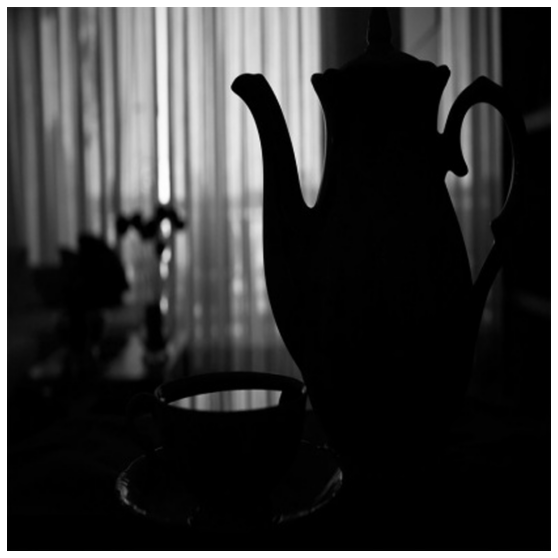


Citra Output


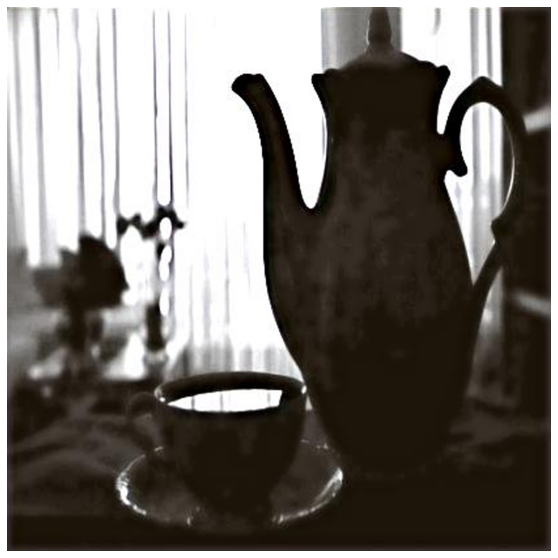

In [ ]:
## Display Enhanced Image Output 

print('Citra Input')
imShow(img_path)
print('\nCitra Output')
imShow(output_path+img_path.split('/')[-1])

In [ ]:
## Enhaced gambar lain

%cd /content/gdrive/MyDrive/skripsi/MIRNet
original_image, output_image = inferer.infer('/content/gdrive/MyDrive/skripsi/test/2015_04170.jpg')
ouput_image = output_image.save('/content/gdrive/MyDrive/skripsi/enhanced/2015_04170.jpg')

/content/gdrive/MyDrive/skripsi/MIRNet
1/1 [==============================] - 1s 547ms/step


Citra Input


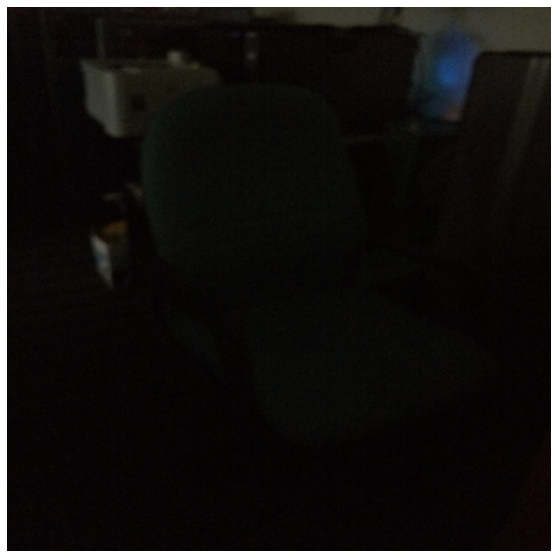


Citra Output


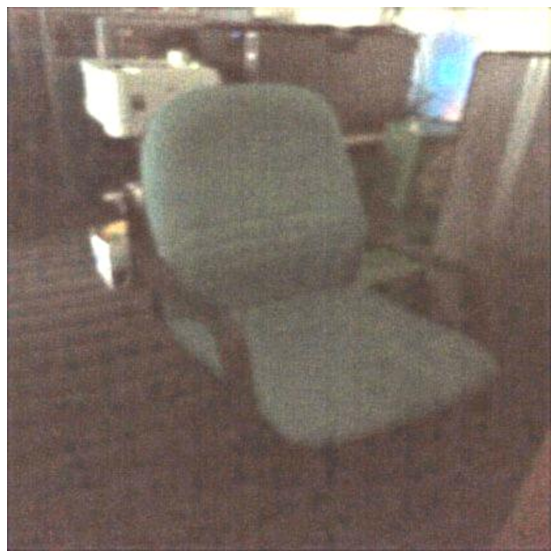

In [ ]:
print('Citra Input')
imShow('/content/gdrive/MyDrive/skripsi/test/2015_04170.jpg')
print('\nCitra Output')
imShow('/content/gdrive/MyDrive/skripsi/enhanced/2015_04170.jpg')

In [ ]:
#install environment from the Makefile
%cd /content/gdrive/MyDrive/skripsi
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!make

/content/gdrive/MyDrive/skripsi
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="ir0bncgt23tViMIvMcVH")
# project = rf.workspace("exdark").project("enhanced-dark")
# dataset = project.version(2).download("darknet")
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ir0bncgt23tViMIvMcVH")
project = rf.workspace("exdark").project("endark-plus")
dataset = project.version(1).download("darknet")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 8.0 MB/s 
     |████████████████████████████████| 178 kB 46.0 MB/s 
     |████████████████████████████████| 1.1 MB 62.8 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 138 kB 63.1 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=583a469204c4b4d81c87f7d70860a7e1d9bfd1c83f90f6391da49d2cb2ad7cb9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: cert

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to EnDark-Plus-1 in darknet:: 100%|██████████| 7474/7474 [00:49<00:00, 150.85it/s]


In [ ]:
dataset.location

'/content/gdrive/MyDrive/skripsi/EnDark-Plus-1'

In [ ]:
#Set up training file directories for custom dataset
%cd /content/gdrive/MyDrive/skripsi
%cp {dataset.location}/train/_darknet.labels data/obj.names
%mkdir data/obj
#copy image and labels
%cp {dataset.location}/train/*.jpg data/obj/
%cp {dataset.location}/valid/*.jpg data/obj/

%cp {dataset.location}/train/*.txt data/obj/
%cp {dataset.location}/valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 7\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir(dataset.location + '/valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

# ExDark Enhanced Images Data Test
import os

%cp EnDark-Plus-1/test/*.jpg data/obj/
%cp EnDark-Plus-1/test/*.txt data/obj/

with open('data/test.txt', 'w') as out:
  for img in [f for f in os.listdir('EnDark-Plus-1/test') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

/content/gdrive/MyDrive/skripsi


In [ ]:
## Cek konfigurasi

%cd /content/gdrive/MyDrive/skripsi
%cat cfg/yolov3-custom.cfg

/content/gdrive/MyDrive/skripsi
[net]
# Testing
# batch=1
# subdivisions=1
# Training
batch=64
subdivisions=12
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 14000
policy=steps
steps=11200,12600
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
act

In [ ]:
# !cp /content/gdrive/MyDrive/yolov3/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/skripsi/cfg
# !cp -r /content/gdrive/MyDrive/yolov3/data/test_exdark /content/gdrive/MyDrive/skripsi/test
# !cp /content/gdrive/MyDrive/low_light_weights_best.h5 /content/gdrive/MyDrive/skripsi/MIRNet

In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

/content/gdrive/MyDrive/skripsi
 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 12, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1

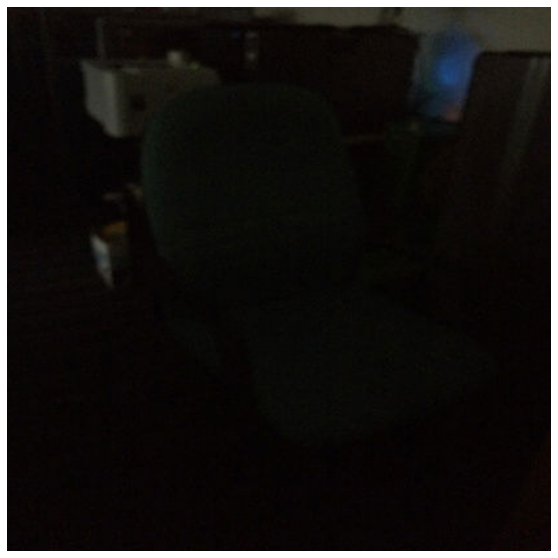

In [ ]:
## Burningnya emang lama, tpi klo udh burning nnti cepet

%cd /content/gdrive/MyDrive/skripsi
# !./darknet detect cfg/yolov3-custom.cfg backup/yolov3-custom_final.weights data/dog.jpg
# !./darknet detect cfg/yolov3-custom.cfg backup/yolov3-custom_final.weights {img_path}
!./darknet detect cfg/yolov3-custom.cfg backup/yolov3-custom_final.weights test/2015_04170.jpg
imShow('/content/gdrive/MyDrive/skripsi/predictions.jpg')

/content/gdrive/MyDrive/skripsi
 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 12, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1

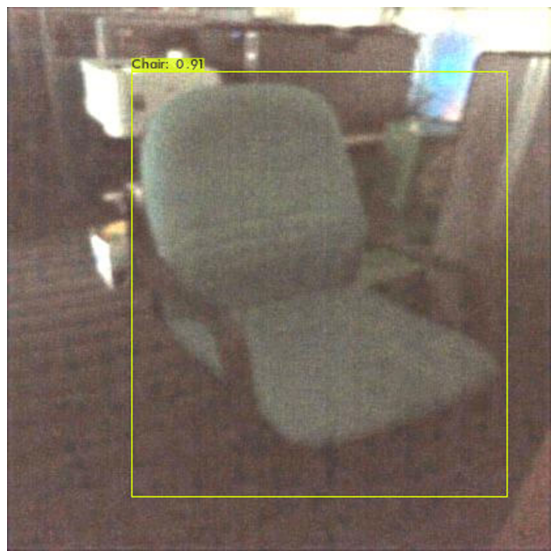

In [ ]:
%cd /content/gdrive/MyDrive/skripsi
# !./darknet detect cfg/yolov3-custom.cfg backup/yolov3-custom_final.weights {output_path+img_path.split('/')[-1]}
!./darknet detect cfg/yolov3-custom.cfg backup/yolov3-custom_final.weights enhanced/2015_04170.jpg
imShow('/content/gdrive/MyDrive/skripsi/predictions.jpg')